In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [163]:
df = pd.read_csv('E:/dev/ml_course_rv/ml_course_homework/student_addiction_dataset_train.csv')

In [164]:
df.head()


,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


<Axes: >

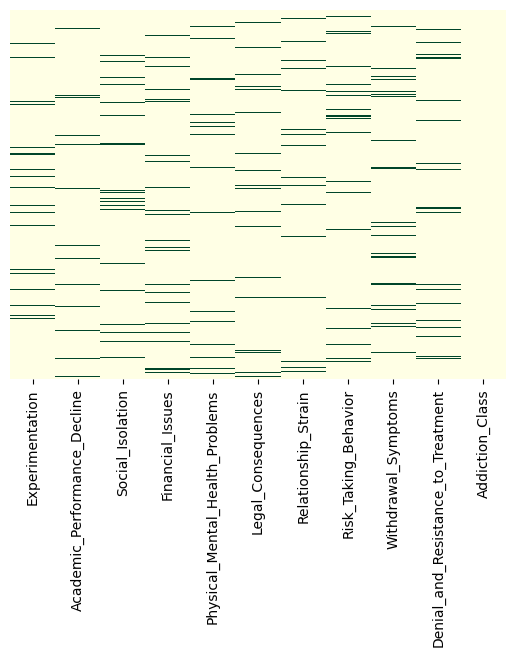

In [165]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="YlGn")

In [166]:
clean_df = pd.DataFrame(df.dropna())

In [167]:
clean_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
5,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No
7,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No


In [168]:
df.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,47780,47844,47792,47805,47888,47766,47799,47765,47730,47889,50342
unique,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No
freq,24017,23955,23898,23993,23986,23915,24010,23938,24058,24071,35270


<Axes: >

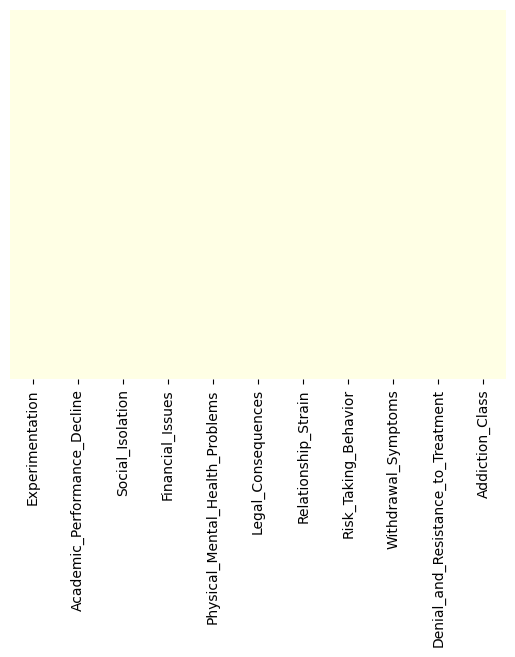

In [169]:
sns.heatmap(clean_df.isnull(), yticklabels=False, cbar=False, cmap="YlGn")

In [170]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30072 entries, 0 to 50340
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     30072 non-null  object
 1   Academic_Performance_Decline        30072 non-null  object
 2   Social_Isolation                    30072 non-null  object
 3   Financial_Issues                    30072 non-null  object
 4   Physical_Mental_Health_Problems     30072 non-null  object
 5   Legal_Consequences                  30072 non-null  object
 6   Relationship_Strain                 30072 non-null  object
 7   Risk_Taking_Behavior                30072 non-null  object
 8   Withdrawal_Symptoms                 30072 non-null  object
 9   Denial_and_Resistance_to_Treatment  30072 non-null  object
 10  Addiction_Class                     30072 non-null  object
dtypes: object(11)
memory usage: 2.8+ MB


In [171]:
clean_df.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,30072,30072,30072,30072,30072,30072,30072,30072,30072,30072,30072
unique,2,2,2,2,2,2,2,2,2,2,2
top,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
freq,15088,15071,15052,15172,15047,15059,15068,15077,15203,15132,20953


In [172]:
for column in clean_df.columns:
    clean_df[column] = pd.Categorical(clean_df[column]).codes

In [173]:
df.head()


,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [174]:
X = clean_df.drop("Addiction_Class", axis=1)
y = clean_df["Addiction_Class"]

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
tree_pred = decision_tree.predict(X_test)

In [180]:
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
print(confusion_matrix(y_test, tree_pred))
print("__________")
print(classification_report(y_test, tree_pred))

[[4128   56]
 [1815   16]]
__________
              precision    recall  f1-score   support

           0       0.69      0.99      0.82      4184
           1       0.22      0.01      0.02      1831

    accuracy                           0.69      6015
   macro avg       0.46      0.50      0.42      6015
weighted avg       0.55      0.69      0.57      6015



RANDOM FOREST

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [184]:
random_pred = random_forest_model.predict(X_test)

In [185]:
print(confusion_matrix(y_test, random_pred))
print("__________")
print(classification_report(y_test, random_pred))

[[4099   85]
 [1804   27]]
__________
              precision    recall  f1-score   support

           0       0.69      0.98      0.81      4184
           1       0.24      0.01      0.03      1831

    accuracy                           0.69      6015
   macro avg       0.47      0.50      0.42      6015
weighted avg       0.56      0.69      0.57      6015

